In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import mlab
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from scipy import signal, stats
from scipy.io import loadmat
from scipy.signal import hilbert
from scipy.signal import lfilter
from scipy.interpolate import interp1d

In [14]:
import z_dependancy as z_dep

%matplotlib

In [15]:
%matplotlib inline

In [16]:
plt.rc('font', size=20)

## Data Generation

(0, 2)

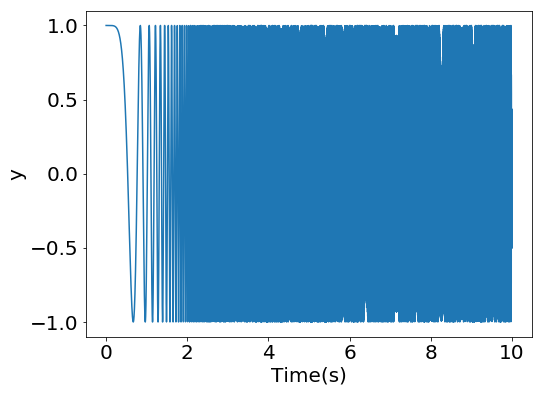

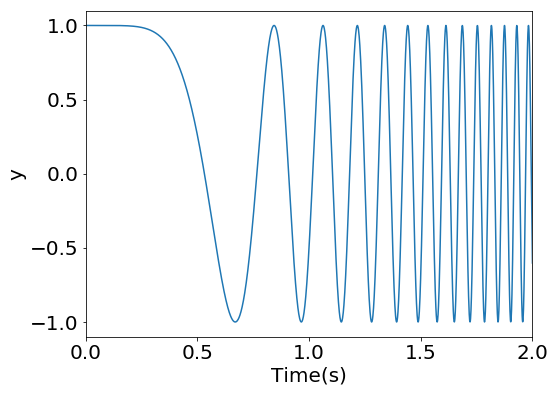

In [95]:
fs = 1024
T = 10
t = np.arange(1/fs,T+1/fs,1/fs)
y=signal.chirp(t,0,1,5,method='quadratic')

plt.figure(figsize=(8,6))
plt.plot(t,y);plt.xlabel('Time(s)'); plt.ylabel('y')

plt.figure(figsize=(8,6))
plt.plot(t,y);plt.xlabel('Time(s)'); plt.ylabel('y')
plt.xlim([0, 2])

## 주파수 분석

In [96]:
[f, A] = z_dep.z_fft_simple(y, fs);

Text(0, 0.5, 'A')

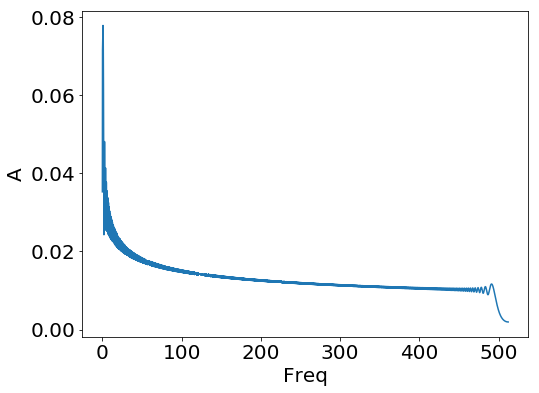

In [97]:
plt.figure(figsize=(8,6))
plt.plot(f,A);plt.xlabel('Freq');plt.ylabel('A')

## Waterfall (Time)


In [98]:
n_div = 20

In [99]:
y_div = y.reshape(-1, n_div,  order="F")
print(y_div.shape)

(512, 20)


In [100]:
y_div_len = np.size(y_div,0)

In [101]:
plot_x=np.tile(t[:y_div_len],[n_div,1]).T
plot_y=np.tile(np.arange(1,n_div+1,1),[y_div_len,1])

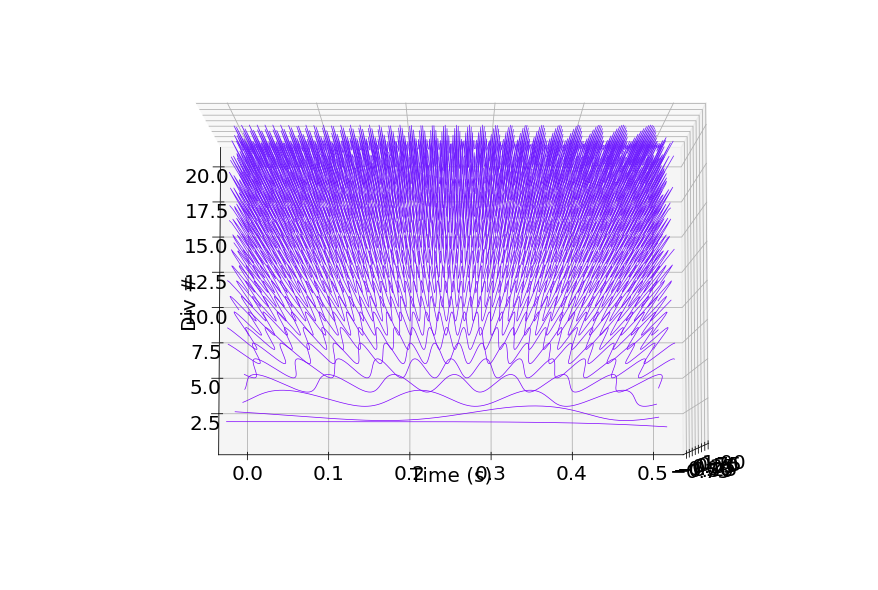

In [102]:
colors = cm.rainbow(np.linspace(0, 1, len(plot_y)))

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig,azim=-0.001,elev=85)
plt.ylabel('Time (s)');plt.xlabel('Div #')
for x, y, z, c in zip(plot_x.T, plot_y.T, y_div.T, colors):
    ax.plot3D(y,x,z,color=c, linewidth=0.7)
plt.gca().invert_xaxis()

## Waterfall (Freq)

In [88]:
A_div=np.empty((0,int((y_div.shape[0])/2+1)),int)
for n in range(n_div):
    f, A = z_dep.z_fft_simple(y_div[:,n]-np.mean(y_div[:,n]),fs)
    A_div = np.append(A_div, np.array([A]), axis=0)
A_div=A_div.T

print(A_div.shape)

(257, 20)


(0, 512)

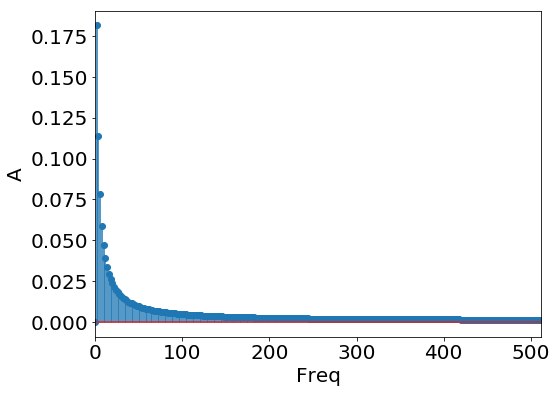

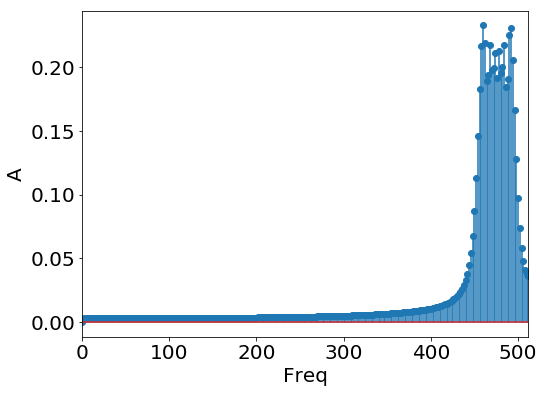

In [89]:
plt.figure(figsize=(8,6))
plt.stem(f, A_div[:,0]);plt.xlabel('Freq');plt.ylabel('A')
plt.xlim([0,512])

plt.figure(figsize=(8,6))
plt.stem(f, A_div[:,-1]);plt.xlabel('Freq');plt.ylabel('A')
plt.xlim([0,512])

In [ ]:
y_div_len = np.size(A_div,0);

plot_x=np.tile(f,[n_div,1]).T
plot_y=np.tile(np.arange(1,n_div+1,1),[y_div_len,1])

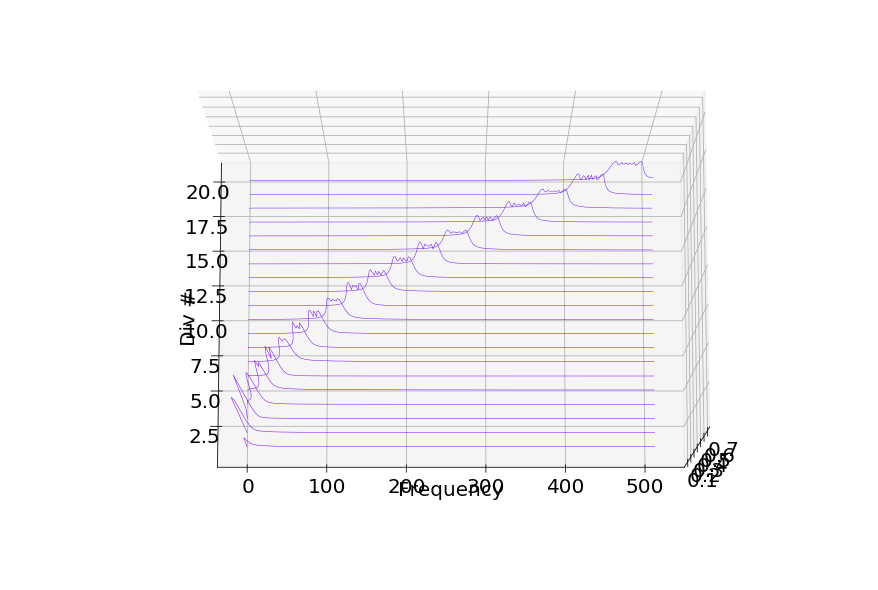

In [92]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig,azim=-0.001,elev=80)
plt.ylabel('Frequency');plt.xlabel('Div #')
for x, y, z, c in zip(plot_x.T, plot_y.T, A_div.T, colors):
    ax.plot3D(y,x,z,color=c, linewidth=0.5)
plt.gca().invert_xaxis()

# Short Time Fourier Transform


Text(0, 0.5, 'y')

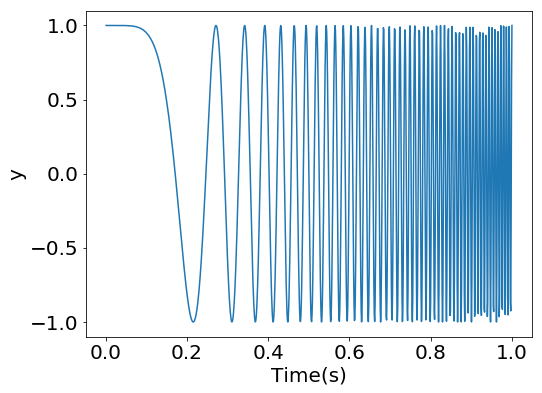

In [32]:
fs = 1024
T = 1
t = np.arange(1/fs,T+1/fs,1/fs)
y=signal.chirp(t,0,1,150,method='quadratic')

plt.figure(figsize=(8,6))
plt.plot(t,y);plt.xlabel('Time(s)'); plt.ylabel('y')

### First Example

7 Time Segments


Text(0, 0.5, 'freq(Hz)')

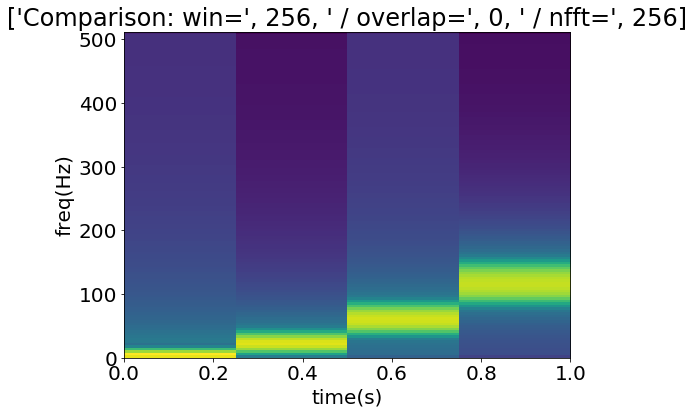

In [33]:
n_win_numb=256;
n_win = np.hamming(n_win_numb);
n_overlap = 0;
nfft = n_win_numb;

print('7 Time Segments')
plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Comparison: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

### Second Example

Text(0, 0.5, 'freq(Hz)')

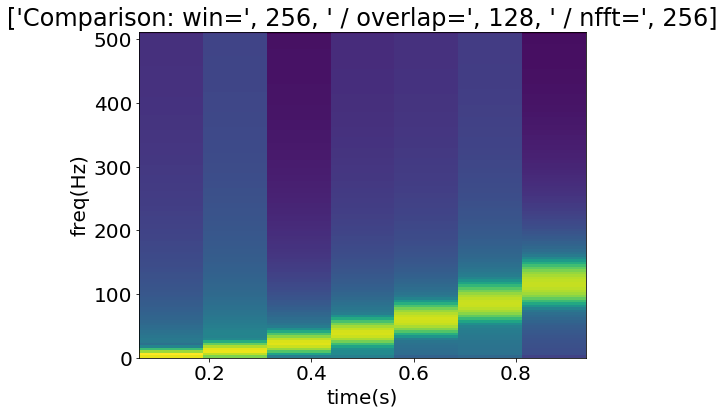

In [34]:
n_win_numb=256;
n_win = np.hamming(n_win_numb);
n_overlap = 128;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Comparison: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

### Third Example

Text(0, 0.5, 'freq(Hz)')

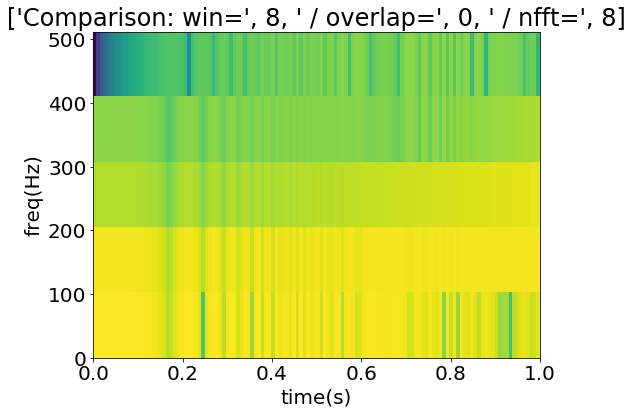

In [35]:
n_win_numb=8;
n_win = np.hamming(n_win_numb);
n_overlap = 0;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Comparison: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

## Increasing winow length


In [36]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 16;
nfft = n_win_numb;

Text(0, 0.5, 'freq(Hz)')

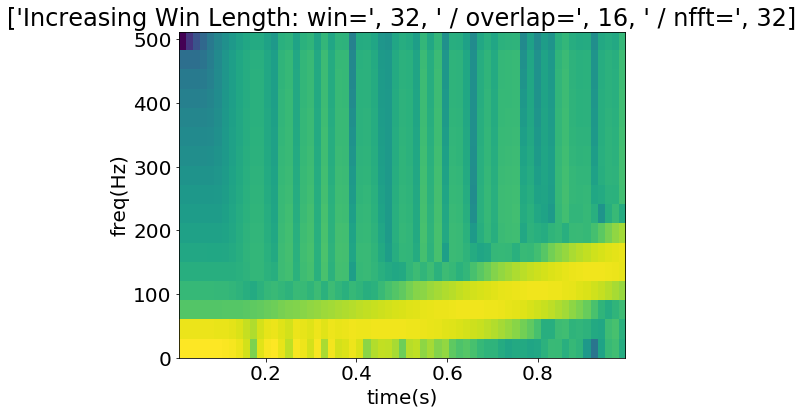

In [37]:
plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Length: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

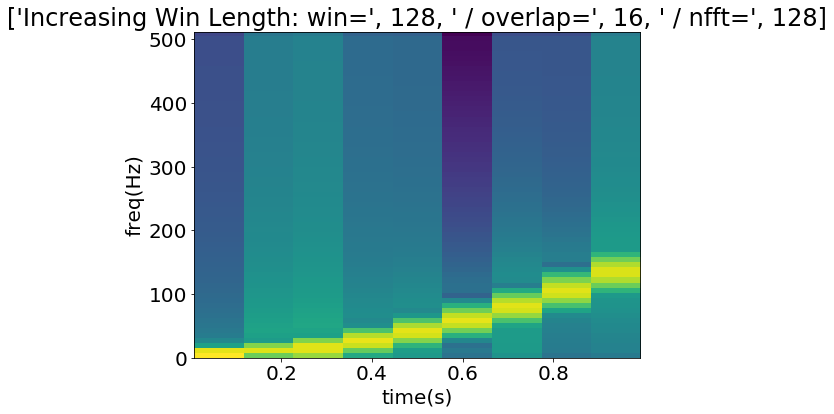

In [38]:
n_win_numb = 128;
n_win = np.hamming(n_win_numb);
n_overlap = 16;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Length: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

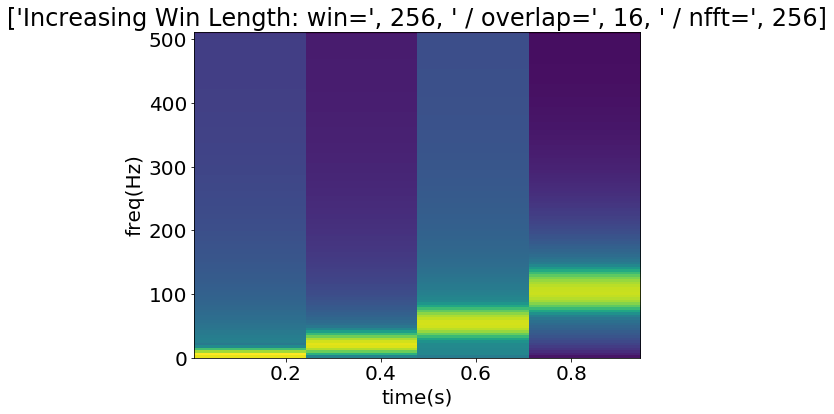

In [39]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 16;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Length: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

## Increasing Overlap


Text(0, 0.5, 'freq(Hz)')

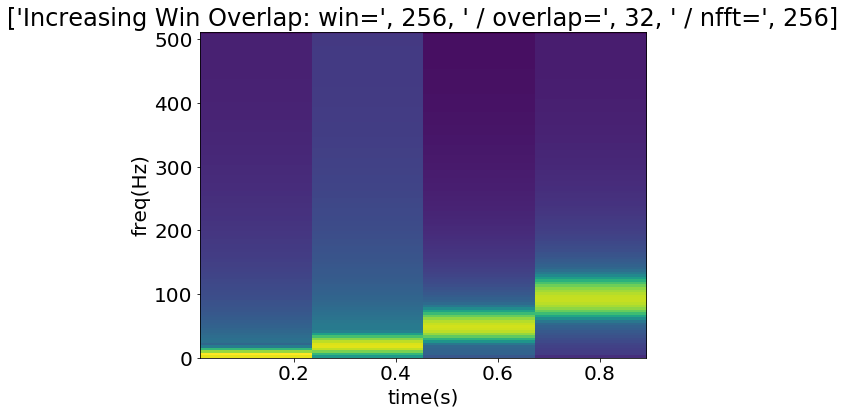

In [40]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 32;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

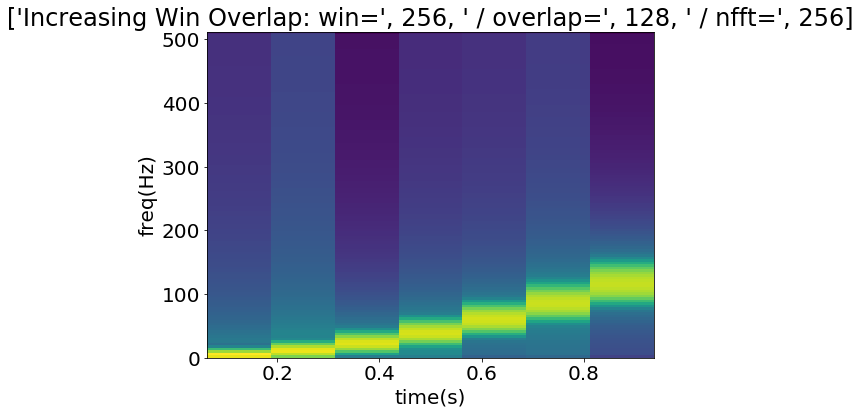

In [41]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 128;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

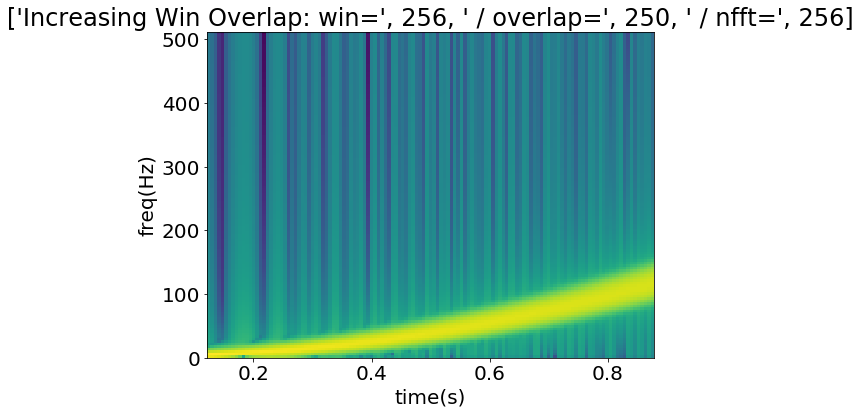

In [42]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 250;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

## Increasing nfft


Text(0, 0.5, 'freq(Hz)')

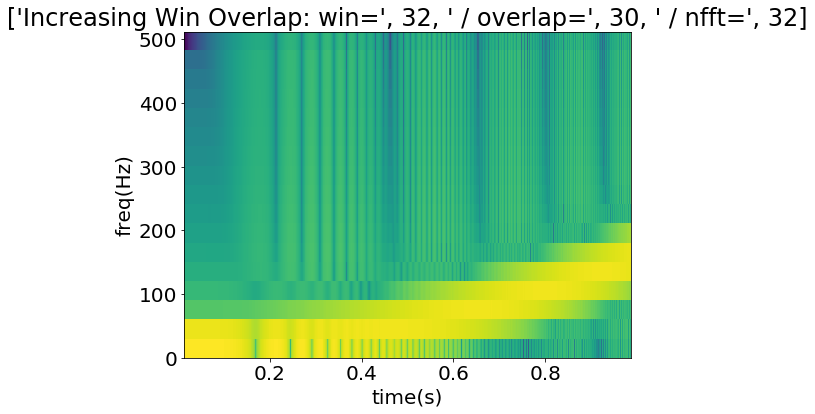

In [43]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 30;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

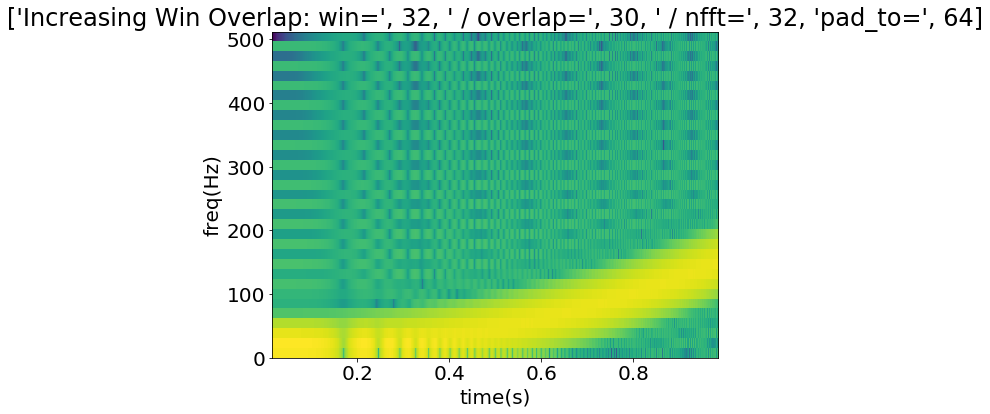

In [44]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 30;
nfft = n_win_numb;
pad_to = nfft*2;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap, pad_to=pad_to);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft, 'pad_to=',pad_to]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

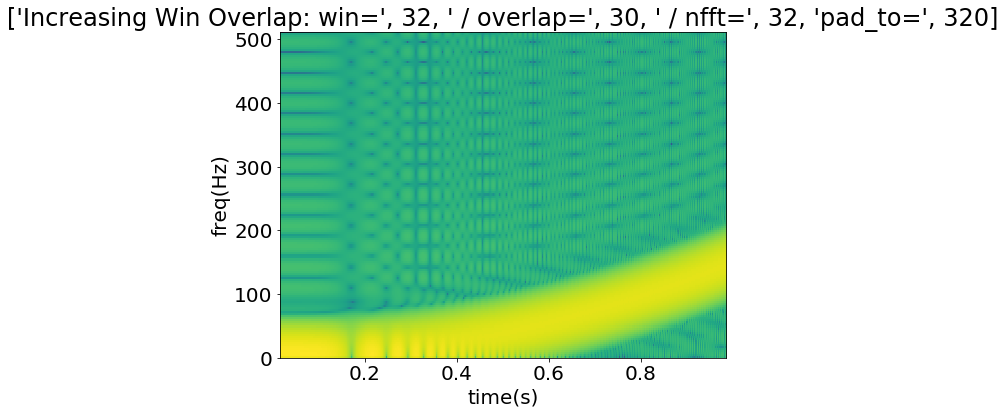

In [45]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 30;
nfft = n_win_numb;
pad_to = nfft*10;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap, pad_to=pad_to);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft, 'pad_to=',pad_to]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

## Comparison Study

Text(0, 0.5, 'freq(Hz)')

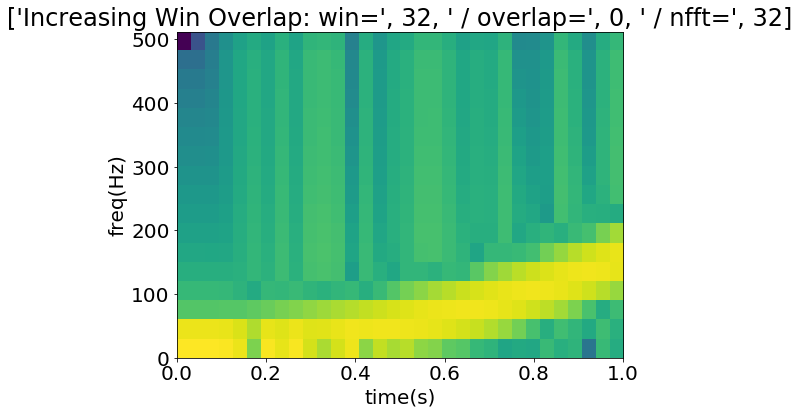

In [46]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 0;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

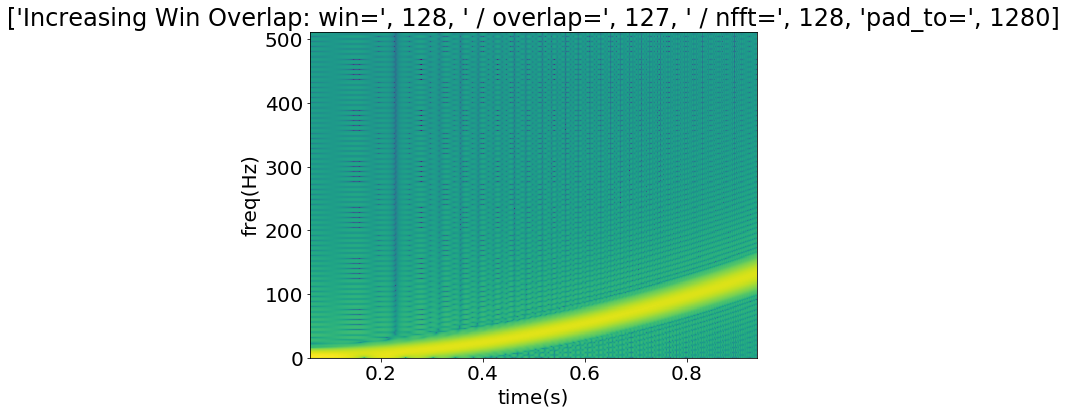

In [47]:
n_win_numb = 128;
n_win = np.hamming(n_win_numb);
n_overlap = 127;
nfft = n_win_numb;
pad_to = nfft*10;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap, pad_to=pad_to);
plt.title(['Increasing Win Overlap: win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft, 'pad_to=',pad_to]);
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')